## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Make_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['with_mask', 'without_mask', 'mask_weared_incorrect']


[2994, 2994, 2994]


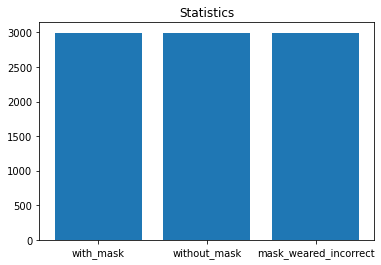

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

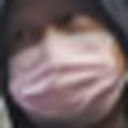

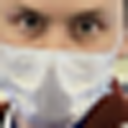

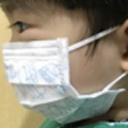

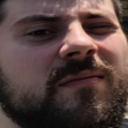

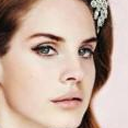

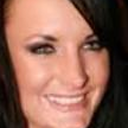

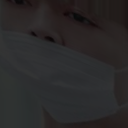

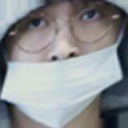

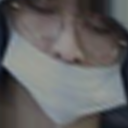

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  # Printing first 3 images from each batch
  for i in range(0,3):
    img= cv2.imread(this_path + '/' + im_count[i])
    cv2_imshow(img)

In [8]:
img_shape = img.shape

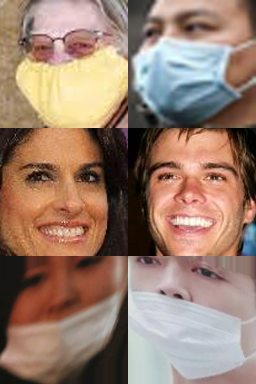

In [9]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
# Your code
img1 = cv2.imread('/content/drive/MyDrive/Make_Dataset/with_mask/1601.png')
img2 = cv2.imread('/content/drive/MyDrive/Make_Dataset/with_mask/2001.png')
img3 = cv2.imread('/content/drive/MyDrive/Make_Dataset/without_mask/1600.png')
img4 = cv2.imread('/content/drive/MyDrive/Make_Dataset/without_mask/2001.png')
img5 = cv2.imread('/content/drive/MyDrive/Make_Dataset/mask_weared_incorrect/99.png')
img6 = cv2.imread('/content/drive/MyDrive/Make_Dataset/mask_weared_incorrect/100.png')
Hori1 = np.concatenate((img1, img2), axis=1)
Hori2 = np.concatenate((img3, img4), axis=1)
Hori3 = np.concatenate((img5, img6), axis=1)
Vert = np.concatenate((Hori1, Hori2, Hori3), axis=0)
cv2_imshow(Vert)

In [10]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
image_shape = []

from collections import Counter

for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in im_count:
    img_path = this_path + '/' + i
    img = cv2.imread(img_path)
    image_shape.append(img.shape)
    items = Counter(image_shape).keys() 

print("The size of images are: ", items)

The size of images are:  dict_keys([(128, 128, 3)])


In [11]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
# If the shape is variable, reshape to a common size 
# If it is same, prove it

image_shape = []

import collections
Output = collections.defaultdict(int)

for elem in image_shape:
      Output[elem] += 1
      if(Output[elem]==image_count):
        print("The count of no. of images with this size is equal to total number of images in the dataset, hence all images have same size")

print(Output)

defaultdict(<class 'int'>, {})


In [12]:
# Anything else you want to plot/experiment
import matplotlib.pyplot as plt
def convertTuple(tup):
    st = '/'.join(map(str, tup))
    return st

for i in Output:
  plt.bar(convertTuple(i), Output[i])
  plt.xlabel('image size')
  plt.ylabel('count')
  plt.show()

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [14]:
# # Choose and define base model
# num_classes = 3

# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])

In [15]:
# model.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=['accuracy'])

In [17]:
# model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=3
# )

In [18]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((256,256,3)),
#     tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
#     tf.keras.layers.Conv2D(3, 3, padding='same', activation='sigmoid'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# model.summary()

In [19]:
# model.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=['accuracy'])

In [20]:
# Print base model summary and have a look at the layers
# model.summary()

In [21]:
#model 2 using VGG
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [22]:
vgg = VGG16(input_shape=img_shape, weights='imagenet', include_top=False)
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [23]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for layer in vgg.layers:
    layer.trainable = False

In [25]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
x = Flatten()(vgg.output)
dense_1 = Dense(units=500, activation='relu')(x)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)

In [41]:
# Add the final output layer
prediction = Dense(units=3, activation='sigmoid')(dense_4)

model_vgg = Model(inputs=vgg.input, outputs=prediction)

In [42]:
# Print your model's summary
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [43]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model_vgg.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [44]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code 
image_generator = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range = 0.2,
                                      validation_split=0.2)

In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [ ]:
# batch_size = 32
# img_height = 128
# img_width = 128

In [ ]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size,
#   )

In [ ]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
# class_names = train_ds.class_names
# print(class_names)

In [ ]:
import numpy as np
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [54]:
# Your code
train_dataset = image_generator.flow_from_directory(batch_size=64,
                                                 directory=path, 
                                                 target_size=(128, 128),
                                                 subset="training",
                                                 class_mode='categorical')
                                                 

validation_dataset = image_generator.flow_from_directory(batch_size=64,
                                                 directory=path,
                                                 target_size=(128, 128),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [32]:
# validation_dataset.shape

### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
# filepath = 'CV_model/{epoch:02d}-{loss:.6f}-{val_loss:.6f}.hdf5'
# callbacks=[EarlyStopping(monitor='val_loss', patience=5),
#           ModelCheckpoint(filepath, monitior='loss', save_best_only=True, mode='min')]

In [55]:
# from keras import optimizers 
# tf.keras.optimizers.Adam(learning_rate=0.01)

r = model_vgg.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=20,
  steps_per_epoch=len(train_dataset),
  validation_steps= len(validation_dataset)
)

Epoch 1/20
113/113 [==============================] - 56s 461ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0966 - val_accuracy: 0.9732
Epoch 2/20
113/113 [==============================] - 52s 460ms/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0905 - val_accuracy: 0.9710
Epoch 3/20
113/113 [==============================] - 52s 463ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 4/20
113/113 [==============================] - 51s 455ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0749 - val_accuracy: 0.9766
Epoch 5/20
113/113 [==============================] - 52s 464ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0878 - val_accuracy: 0.9727
Epoch 6/20
113/113 [==============================] - 61s 543ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0897 - val_accuracy: 0.9771
Epoch 7/20
113/113 [==============================] - 52s 461ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0984 - val_ac

### Evaluate the performance

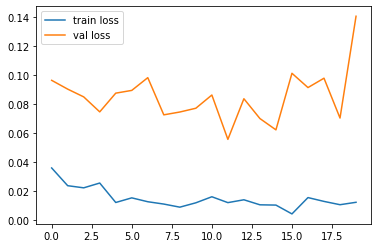

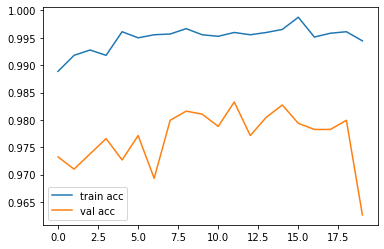

<Figure size 432x288 with 0 Axes>

In [56]:
# Plot training & validation loss/accuracy values
# loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('vgg-loss-rps-1.png')

#accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('vgg-acc-rps-1.png')

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report
import itertools
import numpy as np


validation_classes = []
validation_images = []
for i in range( -(-validation_dataset.samples // validation_dataset.batch_size)):
   batch = validation_dataset.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model_vgg.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


In [59]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)

print(classification_report(validation_classes, y_pred, 
		target_names = ['without_mask', 'mask_weared_incorrect', 'with_mask']))

                       precision    recall  f1-score   support

         without_mask       0.99      0.99      0.99       598
mask_weared_incorrect       1.00      0.90      0.95       598
            with_mask       0.91      0.99      0.95       598

             accuracy                           0.96      1794
            macro avg       0.96      0.96      0.96      1794
         weighted avg       0.96      0.96      0.96      1794

